In [ ]:
import numpy as np

# Максимум 5 баллов - по 1 баллу за задание

### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

### 2. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

### 3. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

### 4. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

### 5. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). Ответ: (np.array([2, 3, 5, 2]), np.array([3, 3, 1, 2])).

##### Замечание. Можно считать, что все указанные объекты непустые (к примеру, в задаче №1 на диагонали матрицы есть ненулевые элементы).
Полезные функции NumPy: np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve.
Многие из этих функций можно использовать так: x.argmin().

# Для каждой из задач:
(a) Написать на Python + NumPy несколько вариантов кода различной эффективности. Должно быть не
менее трёх вариантов, в том числе как минимум один полностью векторизованный вариант (без циклов), и один
вариант без векторизации (с циклами). Третий вариант решения — на ваше усмотрение, например, это может быть
наиболее хорошо читаемый способ решения, или частично векторизованный вариант. Все пункты выполнять в одном google collab, разделяя их пунктами 1., 1.1, 1.2, 1.3; 2., 2.1, 2.2, 2.3; и тд.

(b) Сравнить в IPython Notebook при помощи %timeit скорость работы на нескольких тестовых наборах
РАЗНОГО размера (минимум 3, причём отличаться размеры входных данных должны минимум на порядок. Например, массивы длины 100, 1000, 10000).

(c) Проанализировать полученные данные о скорости работы разных реализаций.

(d) Получить выводы.

In [ ]:
# Deadline - 6 октября в 23:59

1

In [ ]:
X1 = np.array([[j if i == j and j in [3, 5, 7] else 0 for i in range(10)] for j in range(10)])
X2 = np.array([[j if i == j and j in [4, 10, 12, 13] else 0 for i in range(100)] for j in range(100)])
X3 = np.array([[j if i == j and j in [1, 2, 3, 4, 5, 6] else 0 for i in range(1000)] for j in range(1000)])

1.1

In [ ]:
def full_vectorized1(X):
    diag_el = np.diag(X)
    nonzero_idx = np.nonzero(diag_el)
    return np.product(diag_el[nonzero_idx])

1.2

In [ ]:
def non_vectorized(X):

    answer = 0
    for i in range(len(X)):
        for j in range(len(X[i])):
            if i == j and X[i][j] != 0:
                if answer == 0:
                    answer += X[i][j]
                else:
                    answer *= X[i][j]
    return answer

1.3

In [ ]:
def full_vectorized2(X):

    diag_el = np.diag(X)
    return diag_el[diag_el != 0].prod()

In [ ]:
%timeit -n 1000 full_vectorized1(X1)

3.25 µs ± 911 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized(X1)

4.1 µs ± 147 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized2(X1)

2.14 µs ± 85.2 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized1(X2)

3.03 µs ± 175 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized(X2)

117 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized2(X2)

2.38 µs ± 282 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized1(X3)

5.32 µs ± 166 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized(X3)

12.7 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized2(X3)

3.77 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


На небольших данных различие между векторизованной реализацией и нет минимально, однако при увеличении кол-ва данных, скорость не векторизованной вариации растет очень быстро, в то время, как numpy реализации методов на большом количестве данных работают с такой же скоростью, либо быстрее.

2

In [ ]:
X1 = np.random.randint(4, size=10)
sim_X1 = X1
not_sim_X1 = np.random.randint(10, size=10)
X2 = np.random.randint(4, size=100)
sim_X2 = X2
not_sim_X2 = np.random.randint(100, size=100)
X3 = np.random.randint(4, size=1000)
sim_X3 = X3
not_sim_X3 = np.random.randint(1000, size=1000)

2.1

In [ ]:
def full_vectorized(vec1, vec2):
    vec1_items, vec1_counts = np.unique(vec1, return_counts=True)
    vec2_items, vec2_counts = np.unique(vec2, return_counts=True)
    if not np.array_equal(vec1_items, vec2_items):
        return False
    if np.any(vec1_counts != vec2_counts):
        return False

    return True

full_vectorized(X1, sim_X1)

True

In [ ]:
full_vectorized(X1, not_sim_X1)

False

2.2

In [ ]:
def non_vectorized_with_dict(vec1, vec2):
    if len(vec1) != len(vec2):
        return False

    vec1_counter = {}
    vec2_counter = {}

    for i in range(len(vec1)):
        if vec1[i] in vec1_counter:
            vec1_counter[vec1[i]] += 1
        else:
            vec1_counter[vec1[i]] = 1

        if vec2[i] in vec2_counter:
            vec2_counter[vec2[i]] += 1
        else:
            vec2_counter[vec2[i]] = 1

    for key, value in vec1_counter.items():
        if key in vec2_counter.keys():
            if vec1_counter[key] != vec2_counter[key]:
                return False
        else:
            return False

    return True

non_vectorized_with_dict(X1, sim_X1)

True

In [ ]:
non_vectorized_with_dict(X1, not_sim_X1)

False

2.3

In [ ]:
def non_vectorized_with_arr(vec1, vec2):
    if len(vec1) != len(vec2):
        return False
    vec1_counter = [0 for i in range(max(vec1) + 1)]
    vec2_counter = [0 for i in range(max(vec2) + 1)]

    for item1, item2 in zip(vec1, vec2):
        vec1_counter[item1] += 1
        vec2_counter[item2] += 1

    for counter1, counter2 in zip(vec1_counter, vec2_counter):
        if counter1 != counter2:
            return False

    return True

non_vectorized_with_arr(X1, sim_X1)

True

In [ ]:
non_vectorized_with_arr(X1, not_sim_X1)

False

In [ ]:
%timeit -n 1000 full_vectorized(X1, sim_X1)

23.3 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized_with_dict(X1, sim_X1)

4 µs ± 668 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized_with_arr(X1, sim_X1)

3.24 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized(X2, sim_X2)

15.2 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized_with_dict(X2, sim_X2)

33.5 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized_with_arr(X2, sim_X2)

17.4 µs ± 322 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized(X2, sim_X2)

14 µs ± 438 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized_with_dict(X2, sim_X2)

32.3 µs ± 545 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized_with_arr(X2, sim_X2)

17.5 µs ± 174 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Не векторизованная реализация с использованием массива вместо словаря на первых двух тестовых наборах работает быстрее, чем векторизованная, одна на третьем наборе данных, реализация при помощи numpy методов начинает работать быстрее, чем реализация через обычные циклы.

3

In [ ]:
X1 = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
X2 = np.array([i if i % 2 == 0 else 0 for i in range(100)])
X3 = np.array([i if i % 2 == 0 else 0 for i in range(1000)])

3.1

In [ ]:
def full_vectorized(X):
    X = np.hstack((X, 1))
    idx = np.where(X == 0)[0]
    return np.max(X[idx + 1])

full_vectorized(X1)

5

3.2

In [ ]:
def non_vectorized(X):
    maximum = 0
    for i in range(len(X) - 1):
        if X[i] == 0:
            if X[i + 1] > maximum:
                maximum = X[i + 1]
    return maximum

non_vectorized(X1)

5

3.3

In [ ]:
def semi_vectorized(X):
    X = np.hstack((X, 1))
    idx = np.where(X == 0)[0]
    maximum = 0
    for item in idx:
        if X[item + 1] > maximum:
            maximum = X[item + 1]

    return maximum

semi_vectorized(X1)

5

In [ ]:
%timeit -n 1000 full_vectorized(X1)

5.76 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized(X1)

939 ns ± 80.4 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 semi_vectorized(X1)

4.04 µs ± 596 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized(X2)

5.66 µs ± 950 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized(X2)

12.5 µs ± 459 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 semi_vectorized(X2)

13 µs ± 533 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized(X3)

7.14 µs ± 532 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized(X3)

122 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 semi_vectorized(X3)

103 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Реализация основания полностью на методах из numpy на первом наборе данных работает в 3,5 раза медленней, чем реализация на циклах, однако при увеличении данных версия с использованием np.arr начинает работать на 25-30% медленнее, когда как реализация на циклах увеличивает свое время работы в 40-50 раз.

4

In [ ]:
import matplotlib.pyplot as plt
import imageio.v3 as iio

# Четырех канальное изображение
image1 = iio.imread('/Users/anatoliy/Downloads/Corgi-PNG-Clipart.png')
# Трех канальное изображение
image2 = iio.imread('/Users/anatoliy/Downloads/pngegg.png')

image3 = iio.imread('/Users/anatoliy/Downloads/o2m4j998n29cbakvydd14it0pds2ibeu.jpeg')

<function matplotlib.pyplot.show(close=None, block=None)>

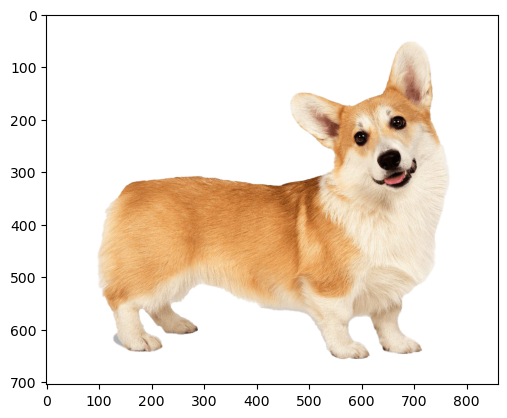

In [ ]:
plt.imshow(image1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

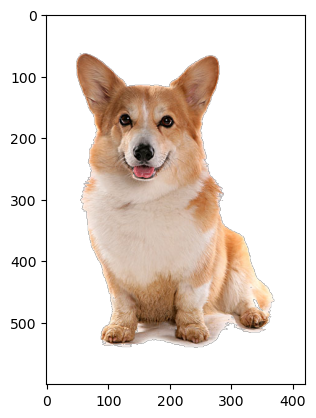

In [ ]:
plt.imshow(image2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

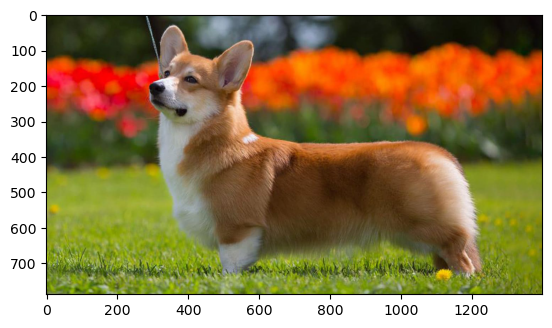

In [ ]:
plt.imshow(image3)
plt.show

In [ ]:
image1.shape, image2.shape, image3.shape

((704, 860, 4), (600, 420, 4), (788, 1400, 3))

4.1

In [ ]:
def rgb_to_gray_full_vectorized(image):
    num_channels = image.shape[2]
    coeff = np.hstack((np.array([0.299, 0.587, 0.114]), [0] * (num_channels - 3)))
    gray_img = np.dot(image, coeff).round().astype(int)
    gray_img = np.stack([gray_img] * num_channels, axis=-1)
    return gray_img

In [ ]:
rgb_to_gray_full_vectorized(image2)

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]])

<function matplotlib.pyplot.show(close=None, block=None)>

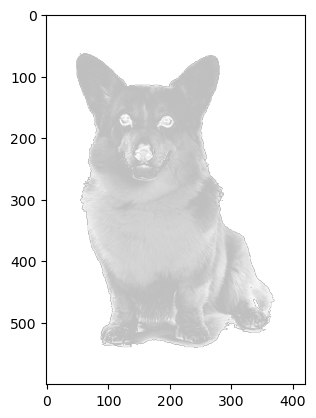

In [ ]:
plt.imshow(rgb_to_gray_full_vectorized(image2))
plt.show

4.2

In [ ]:
image1.shape

(704, 860, 4)

In [ ]:
image1

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [ ]:
image2.shape

(600, 420, 4)

In [ ]:
image2

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [ ]:
def non_vectorized(image):
    t_image = image.copy()
    coef = [0.299, 0.587, 0.114] + [0] * (t_image.shape[2] - 3)
    grey_img = []
    for i in range(t_image.shape[0]):
        grey_row = []

        for j in range(t_image.shape[1]):
            sum = 0
            for k in range(t_image.shape[2]):
                sum += round(t_image[i][j][k] * coef[k])
            grey_row.append([sum] * t_image.shape[2])
        grey_img.append(grey_row)
    return grey_img

<function matplotlib.pyplot.show(close=None, block=None)>

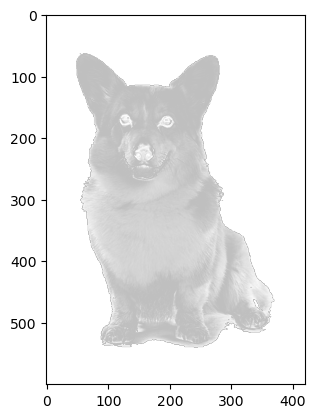

In [ ]:
plt.imshow(non_vectorized(image2))
plt.show

In [ ]:
image2.shape

(600, 420, 4)

In [ ]:
non_vectorized(image2)

In [ ]:
def semi_vectorized(image):
    t_image = image.copy()
    coef = [0.299, 0.587, 0.114] + [0] * (t_image.shape[2] - 3)
    grey_img = np.array([])
    for i in range(t_image.shape[0]):
        grey_row = np.array([])

        for j in range(t_image.shape[1]):
            sum = 0
            sum = np.round(np.sum(t_image[i][j] * coef))
            sum = np.array([sum] * t_image.shape[2])
            grey_row = np.hstack((grey_row, sum))
        grey_img = np.hstack((grey_img, grey_row)).astype(int)
    return grey_img.reshape(image.shape[0], image.shape[1], image.shape[2])

In [ ]:
semi_vectorized(image2)

<function matplotlib.pyplot.show(close=None, block=None)>

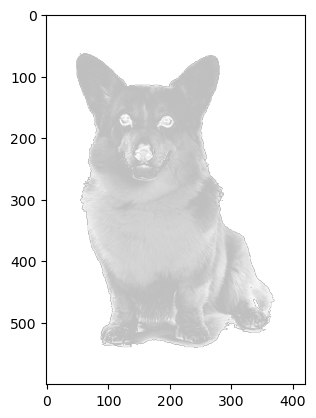

In [ ]:
plt.imshow(semi_vectorized(image2))
plt.show

In [ ]:
%timeit -n 100 rgb_to_gray_full_vectorized(image2)

4.32 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 non_vectorized(image2)

1.4 s ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 semi_vectorized(image2)

2.11 s ± 17.7 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 rgb_to_gray_full_vectorized(image2)

4.89 ms ± 401 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 non_vectorized(image2)

1.37 s ± 3.63 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 semi_vectorized(image2)

2.1 s ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 rgb_to_gray_full_vectorized(image2)

4.34 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 non_vectorized(image2)

1.41 s ± 7.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 semi_vectorized(image2)

2.1 s ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Не векторизованный вариант и частично векторизованный работают настолько долго с самого начала, что лучше их не использовать.

5

In [ ]:
X1 = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])
X2 = np.array([1] * 10 + [2] * 20 + [3] * 30 + [1] * 40)
X3 = np.array([1] * 100 + [2] * 200 + [3] * 300 + [1] * 400)

5.1

In [ ]:
def full_vectorized(X):
    y = np.hstack((np.inf, X[:-1]))
    joint_idxs = X != y
    nums = X[np.where(joint_idxs==True)]
    joint_idxs = np.arange(np.size(X))[joint_idxs]
    joint_idxs = np.hstack((joint_idxs, np.size(X)))

    return nums, np.diff(joint_idxs)

In [ ]:
full_vectorized(X1)

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))

5.2

In [ ]:
def non_vectorized(X):
    counter = 1
    counters = []
    nums = []
    for i in range(1, len(X)):
        if X[i - 1] == X[i]:
            counter += 1
        else:
            counters.append(counter)
            nums.append(X[i - 1])
            counter = 1
    nums.append(X[-1])
    counters.append(counter)
    return nums, counters

In [ ]:
non_vectorized(X1)

([2, 3, 5, 2], [3, 3, 1, 2])

5.3

In [ ]:
def semi_vectorized(X):
    el_diff = np.diff(X)
    idxs = np.where(el_diff != 0)[0] + 1
    idxs = np.hstack(([0], idxs, len(X)))
    counters = []
    nums = []
    for i in range(1, len(idxs)):
        counters.append(idxs[i] - idxs[i - 1])
        nums.append(X[idxs[i - 1]])
    return nums, counters

In [ ]:
semi_vectorized(X1)

([2, 3, 5, 2], [3, 3, 1, 2])

In [ ]:
%timeit -n 1000 full_vectorized(X1)

9.62 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized(X1)

The slowest run took 4.04 times longer than the fastest. This could mean that an intermediate result is being cached.
2.43 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 semi_vectorized(X1)

7.95 µs ± 948 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized(X2)

8 µs ± 513 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized(X2)

11.4 µs ± 207 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 semi_vectorized(X2)

6.32 µs ± 690 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 full_vectorized(X3)

9.07 µs ± 232 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 non_vectorized(X3)

103 µs ± 860 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit -n 1000 semi_vectorized(X3)

6.69 µs ± 249 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


На 1 и 2 тестовом сете алгоритмы работают с небольшой разницей во времени, однако на всех тестовых сетах частично векторизованный вариант работает быстрее чем полностью векторизованный. Возможно стоило полностью векторизованный вариант сделать через идею semi_vectorized(). Использовать метод diff, чтобы найти индексы, на которых элементы различны, а не использовать решение через создание True/False массива.

Общий вывод: Стоит использовать np.array и numpy функции, так как при увеличении количества данных на порядок, скорость работы увеличивается не сильно, в отличии от алгоритмов, которые были описаны через циклы. Это связано с тем, что операции с numpy массива гораздо лучше оптимизированны, чем операции со списками python. Причем оптимизация заключается в их более низкоуровневой реализации.